In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path as path
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# paths for the directories
home_dir = path.cwd().parent                                  # home directory
data_dir = home_dir / 'data'                                  # data directory
iterim_data_dir = data_dir / 'interim'                        # interim data directory path
dataset_path = iterim_data_dir / "flat-house-dataset_v2.csv"  # dataset path

In [3]:
# loading the dataset into pandas dataframe
df = pd.read_csv(dataset_path)

# checking few rows from the dataset
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
0,flat,umang monsoon breeze,sector 78,0.95,5491.0,1730.0,Built Up area: 1730 (160.72 sq.m.),3.0,3,2,...,NaN,1730.00,NaN,0,0,0,0,0,0,65
1,flat,experion the heartsong,sector 108,1.68,8387.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3.0,3,3+,...,2003.0,1338.29,986.41,1,0,0,1,0,0,86
2,flat,umang winter hills,sector 77,0.75,5588.0,1342.0,Super Built up area 1342(124.68 sq.m.)Built Up...,2.0,2,2,...,1342.0,1140.00,969.00,0,0,0,0,1,0,102
3,flat,shree vardhman flora,sector 90,0.92,4717.0,1950.0,Carpet area: 1950 (181.16 sq.m.),3.0,3,2,...,NaN,NaN,1950.00,0,0,0,1,0,0,49
4,flat,dlf park place,sector 54,4.85,30180.0,1607.0,Super Built up area 1983(184.23 sq.m.)Built Up...,3.0,4,3+,...,1983.0,1785.00,1607.00,1,0,0,0,0,1,158


In [4]:
# checking the shape of the dataset
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (3793, 23)


In [5]:
# taking a brief overview over the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3793 non-null   object 
 1   society              3793 non-null   object 
 2   sector               3793 non-null   object 
 3   price                3775 non-null   float64
 4   price_per_sqft       3775 non-null   float64
 5   area                 3775 non-null   float64
 6   areaWithType         3793 non-null   object 
 7   bedRoom              3793 non-null   float64
 8   bathroom             3793 non-null   int64  
 9   balcony              3793 non-null   object 
 10  floorNum             3776 non-null   float64
 11  facing               2695 non-null   object 
 12  agePossession        3793 non-null   object 
 13  super_built_up_area  1913 non-null   float64
 14  built_up_area        1731 non-null   float64
 15  carpet_area          1938 non-null   f

In [6]:
# checking for the duplicated rows in the dataset
print(f"Count of the duplicated rows in the dataset: {df.duplicated().sum()}")

Count of the duplicated rows in the dataset: 125


In [7]:
# removing the duplicated rows from the dataset
df.drop_duplicates(inplace=True)

### Feature Name: property_type

flats are 76.58% of the total dataset
houses are 23.42% of the total dataset


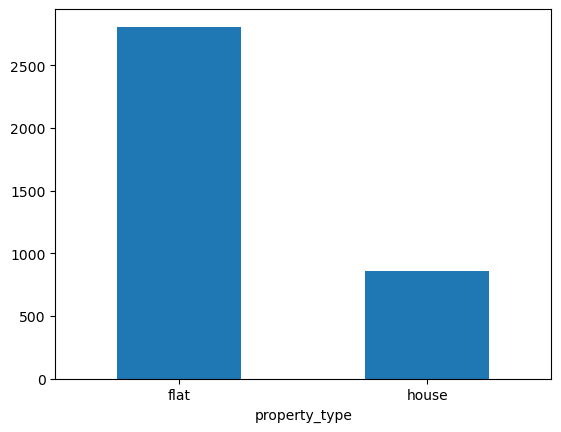

In [8]:
# calculate the value count for property_type
property_type_count = df['property_type'].value_counts()
print(f"flats are {round(property_type_count['flat']/property_type_count.sum() *100, 2)}% of the total dataset")
print(f"houses are {round(property_type_count['house']/property_type_count.sum() *100, 2)}% of the total dataset")

# plotting the graph
df['property_type'].value_counts().plot(kind='bar', rot=0);

In [9]:
# checking for the null values in 'property_type' column
df.property_type.isnull().sum()

0

### Observations
- flats are in majority approx 76 percent and there are less numbers of houses approx 23 percent
- No missing values

### Feature Name: society

In [10]:
# count of unique societies
print(f"Total unique society in the dataset: {df['society'].value_counts().count()}")

Total unique society in the dataset: 671


In [11]:
# taking a look at the society names
df['society'].value_counts()

society
independent                             486
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
                                       ... 
hector trimurti heights                   1
awho sispal vihar                         1
aipl joy square                           1
kamal residence                           1
eros wembley estate                       1
Name: count, Length: 671, dtype: int64

In [12]:
# when we consider 'non-independent' society, we can obeserve that top 75 society represent the approx 50% of the data

# `normalize=True` argument ensures that the counts are represented as proportion of total, adding up to 1
# 'cumsum()' This function calculates the cumulative sum of the society type proportions.\
# for each society type, it adds its proportion to the proportion of all society types before it. \
# this creates a running total of the percentage of properties belonging to each society type (excluding 'independent')

df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023570
ss the leaf                             0.046512
dlf new town heights                    0.059711
shapoorji pallonji joyville gurugram    0.072910
signature global park                   0.083909
                                          ...   
indiabulls enigma                       0.491829
dlf the primus                          0.495915
umang monsoon breeze                    0.500000
mvn athens                              0.503771
unitech uniworld resorts                0.507542
Name: proportion, Length: 75, dtype: float64

In [13]:
# unique societies in the dataset
society_counts = df['society'].value_counts()

# keeping the society distribution in bins for easy understanding
# frequency distribution for society

frequency_bins = {
    "Very High (>100)":(society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts <=50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}

# for better visulaization, converting it into pandas dataframe
society_freq_df = pd.DataFrame.from_dict(frequency_bins, orient='index', columns=['frequency_count'])

society_freq_df

,frequency_count
Very High (>100),1
High (50-100),2
Average (10-49),92
Low (2-9),272
Very Low (1),304


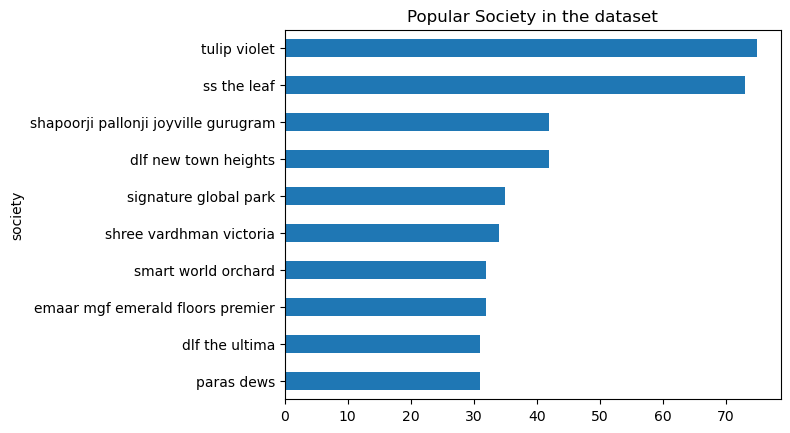

In [14]:
# plotting the top 10 society in the dataset
df[df['society'] != 'independent']['society'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')
plt.title('Popular Society in the dataset');

In [15]:
# checking for null values in 'society' column
df['society'].isnull().sum()

0

In [16]:
# Calculate the count of properties flagged as "independent"
independent_society_count = df[df['society']=='independent']['society'].count()

# Calculate the percentage of "independent" properties
percentage_independent = round(independent_society_count / df.shape[0] * 100, 2)

# Print the result
print(f"{percentage_independent}% of properties are flagged as independent in the dataset")


13.25% of properties are flagged as independent in the dataset


### observations

- Around 13% properties comes under independent tag.
- There are 671 societies. 
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
    - Very High (>100): Only 1 society has more than 100 listings.
    - High (50-100): 2 societies have between 50 to 100 listings.
    - Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
    - Low (2-9): 272 societies have between 2 to 9 listings.
    - Very Low (1): A significant number, 3084 societies, have only 1 listing.

### Observations

- Approximately 13% of the properties fall under the independent tag.

- There are a total of 671 societies.

- The top 75 societies account for 50% of the properties, while the remaining 50% of the properties are distributed among the other 600 societies.

  - Very High (>100): Only 1 society has more than 100 listings.
  
  - High (50-100): 2 societies have between 50 to 100 listings.
  
  - Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
  
  - Low (2-9): 272 societies have between 2 to 9 listings.
  
  - Very Low (1): A significant number, 3084 societies, have only 1 listing.


### Feature Name: sector

In [21]:
# unqiue sectors in the dataset
print(f"Unique sectors in the dataset: {df['sector'].value_counts().count()}")

Unique sectors in the dataset: 106


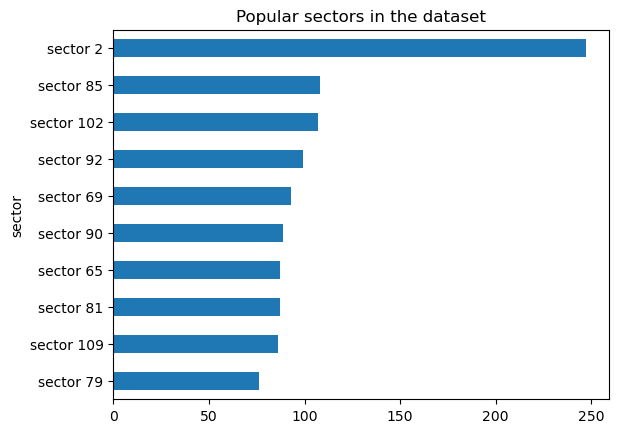

In [26]:
# top 10 sectors in the dataset
df['sector'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')
plt.title("Popular sectors in the dataset");

In [28]:
# Frequency distribution for sectors
# Calculate the number of occurrences for each sector in the DataFrame column 'sector'
sector_counts = df['sector'].value_counts()

# Define bins for sector frequency distribution
sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),  # Count sectors with more than 100 occurrences
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),  # Count sectors with 50 to 100 occurrences
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),  # Count sectors with 10 to 49 occurrences
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),  # Count sectors with 2 to 9 occurrences
    "Very Low (1)": (sector_counts == 1).sum()  # Count sectors with only 1 occurrence
}

# for better visulaization, converting it into pandas dataframe
sector_freq_df = pd.DataFrame.from_dict(sector_frequency_bins, orient='index', columns=['frequency_count'])

sector_freq_df

,frequency_count
Very High (>100),3
High (50-100),24
Average (10-49),60
Low (2-9),18
Very Low (1),1


### Observations

- There are a total of 106 unique sectors in the dataset.
- Frequency distribution of sectors:
    - Very High (>100): 3 sectors have more than 100 listings.
    - High (50-100): 24 sectors have between 50 to 100 listings.
    - Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49 listings each.
    - Low (2-9): 18 sectors have between 2 to 9 listings.
    - Very Low (1): Interestingly, there are no sectors with only 1 listing.

### Feature Name: price

In [29]:
# checking the missing values in 'price' column
print(f"Missing values in the 'price' column: {df['price'].isnull().sum()}")

Missing values in the 'price' column: 17


In [30]:
# checking the stats detaitls about the 'price' column
df['price'].describe()

count    3651.000000
mean        2.536459
std         2.982068
min         0.070000
25%         0.950000
50%         1.540000
75%         2.750000
max        31.500000
Name: price, dtype: float64

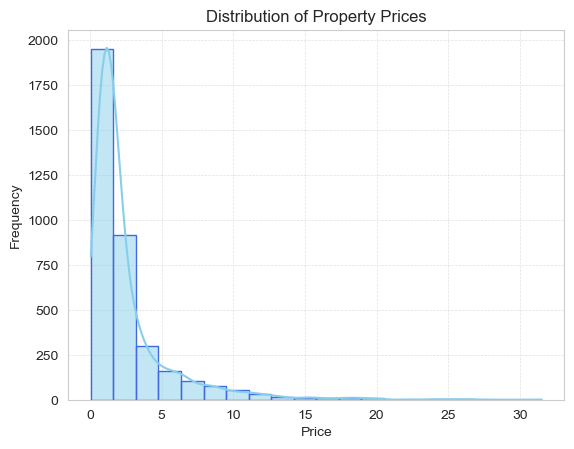

In [36]:
# Plotting the histogram for better visualization
sns.histplot(df['price'], kde=True, bins=20, color='skyblue', edgecolor='royalblue')

sns.set_style("whitegrid")  # Set the background style to white grid for better contrast

plt.title('Distribution of Property Prices')  # Add title to the plot
plt.xlabel('Price')  # Label x-axis
plt.ylabel('Frequency')  # Label y-axis

# Add gridlines for better readability
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=grid_alpha)
plt.show()

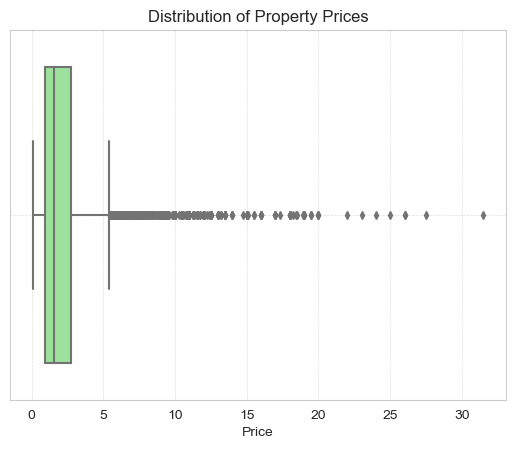

In [37]:
sns.boxplot(x=df['price'], color='lightgreen', linewidth=1.5, fliersize=4)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.show()